# Анализ рейтингов фильмов: можно ли доверять оценкам?

## 🔍 Обзор

Перед выбором фильма для просмотра пользователи часто ориентируются на онлайн-рейтинги.  
Однако возникает вопрос: насколько объективны эти оценки? Особенно если платформа,  
предоставляющая рейтинги, одновременно занимается продажей билетов.  
Возможна ли ситуация, когда оценки фильмов завышаются с целью увеличения продаж?

### 🎯 Цель проекта

В данном проекте будет проведен анализ рейтингов фильмов на платформе Fandango  
с целью выявления возможных отклонений в оценках. Анализ основан на методологии,  
используемой в исследовании FiveThirtyEight. Основная задача — проверить,  
существовала ли тенденция завышения рейтингов фильмов на Fandango в 2015 году.

Для этого будут использованы:  
✔️ **Pandas** — для обработки и анализа данных.  
✔️ **Seaborn и Matplotlib** — для визуализации результатов.  

---

## 📌 Часть 1: Первичный анализ данных

Перед проведением анализа необходимо ознакомиться с данными:  
- Какие рейтинги представлены в датасете?  
- Присутствуют ли отклонения или аномалии?  
- Как Fandango оценивает фильмы по сравнению с другими платформами?

> **Дополнительно:** Исследование основано на статье  
[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/),  
где подробно рассматривается проблема возможного завышения рейтингов.


-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 2: Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.


In [153]:
fandango = pd.read_csv("fandango_scrape.csv")

In [154]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [155]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [156]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## 📊 Анализ связи между популярностью фильма и его рейтингом

Для исследования зависимости между рейтингом фильма и его популярностью  
будет построен **scatterplot (диаграмма рассеяния)**, где:  
- **Ось X** — количество голосов (`VOTES`), отражающее популярность фильма.  
- **Ось Y** — средний рейтинг (`RATING`), показывающий оценку фильма зрителями.  

Визуализация позволит определить, существует ли закономерность между  
числом голосов и рейтингом: получают ли более популярные фильмы более высокие оценки?

<Axes: xlabel='VOTES', ylabel='RATING'>

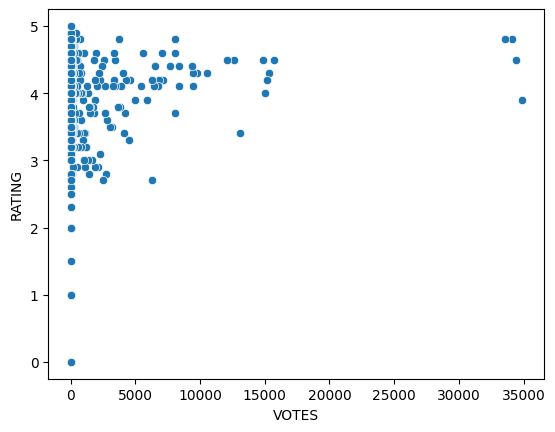

In [157]:
sns.scatterplot(x='VOTES', y='RATING',data=fandango)

Вычислим корреляцию между колонками

In [158]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Создадим новую колонку с годом выхода фильма

In [159]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].strip(')')).astype(int)

In [160]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

Визуализируем количество фильмов по годам

<Axes: xlabel='YEAR', ylabel='count'>

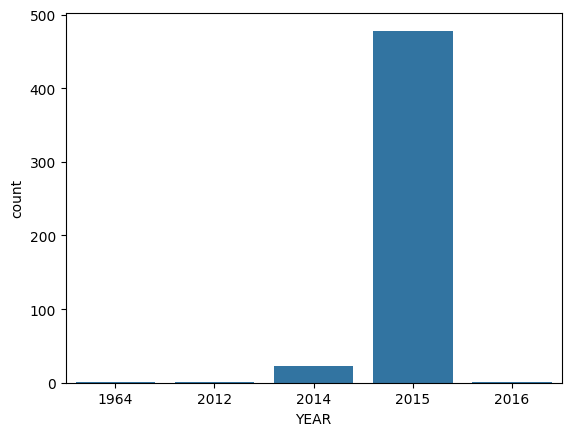

In [161]:
sns.countplot(x='YEAR', data=fandango)

10 фильмов получили наибольшее количество голосов

In [162]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Количество фильмов с нулевыми отзывами

In [163]:
no_votes = fandango['VOTES']==0 
no_votes.sum()

69

In [164]:
reviewed = fandango[fandango['VOTES']>0].copy()

## 🎭 Визуализация различий между отображаемыми и реальными рейтингами

На платформе Fandango пользователи видят рейтинги фильмов в виде **звезд**,  
но из-за особенностей округления отображаемые оценки (`STARS`) могут  
отличаться от истинных средних значений (`RATING`), рассчитанных на основе голосов.

Для анализа этой разницы будет построен **KDE-график (Kernel Density Estimation)**

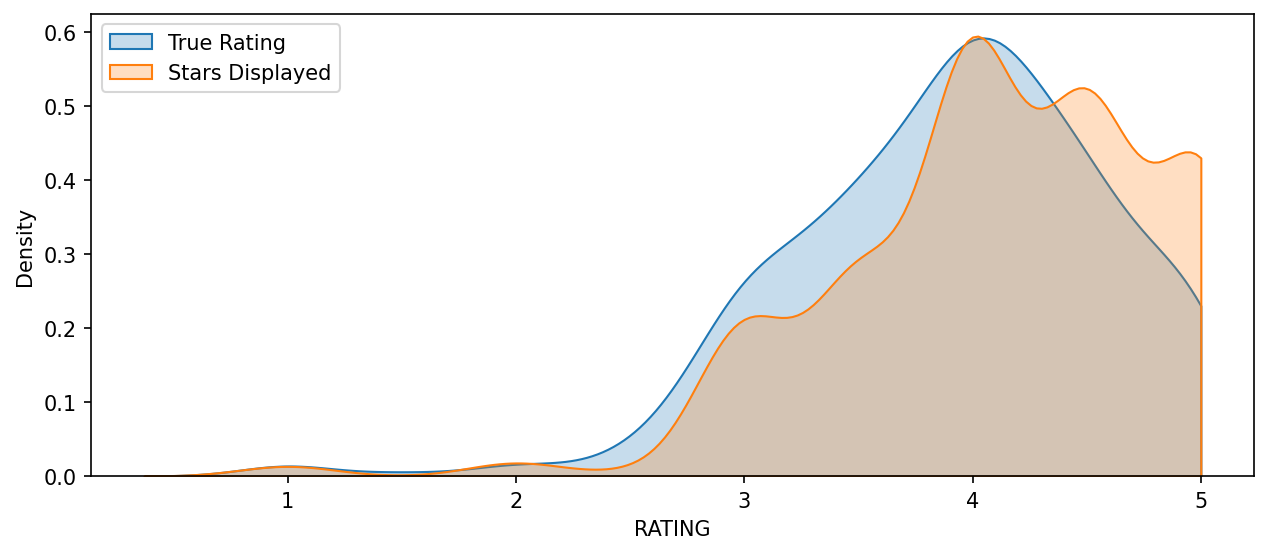

In [165]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend()

Посчитаем разницу между колонками STARS и RATING в числовом виде

In [166]:
reviewed['STARS_DIFF'] = reviewed['STARS'] - reviewed['RATING']
reviewed['STARS_DIFF'] = reviewed['STARS_DIFF'].round(2)

In [167]:
reviewed.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**Нарисуем график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

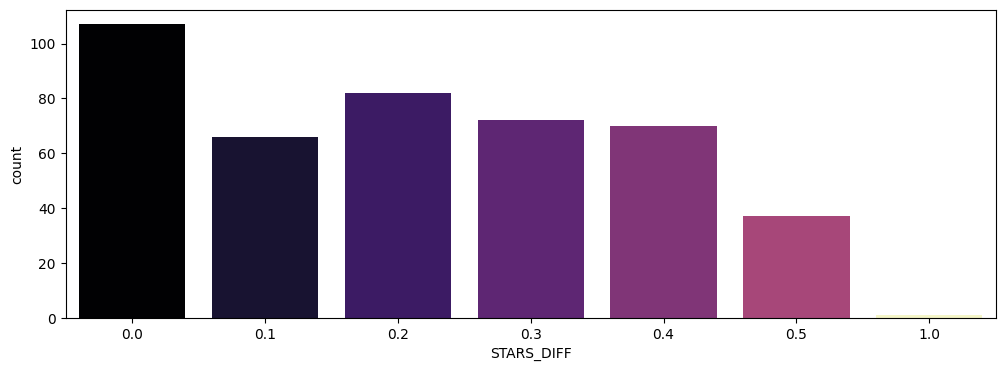

In [168]:
plt.figure(figsize=(12,4))
sns.countplot(x='STARS_DIFF', data=reviewed, hue='STARS_DIFF', palette='magma', legend=False)

**На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом, найдем этот фильм.**

In [169]:
reviewed[reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

Давайте посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.

**В файле "all_sites_scores.csv" содержится информация с других платформ**

In [170]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [171]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [172]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [173]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**ЗНарисуем график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

<Axes: xlabel='RottenTomatoes_User', ylabel='RottenTomatoes'>

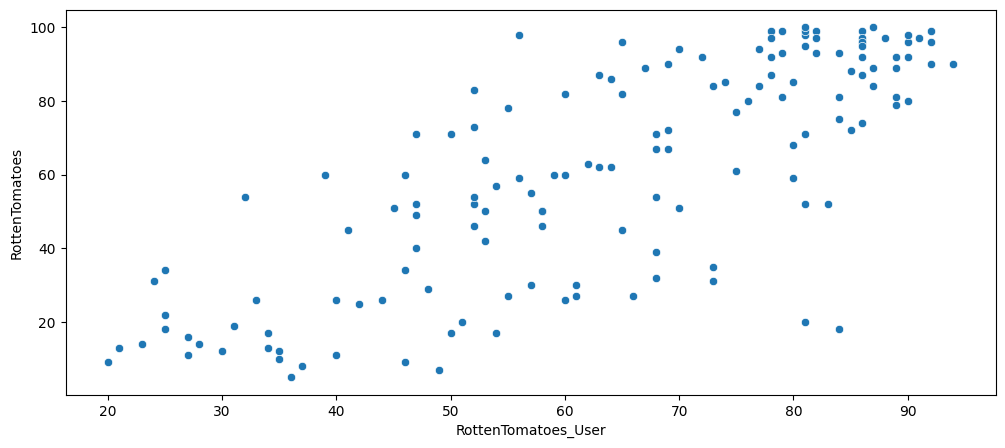

In [174]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='RottenTomatoes_User', y='RottenTomatoes', data=all_sites)

## 🎬 Разница между оценками критиков и пользователей  

Рейтинги фильмов на платформе Rotten Tomatoes могут существенно отличаться  
в зависимости от того, кто выставляет оценку:  
- **Критики** (RottenTomatoes)  
- **Обычные зрители** (RottenTomatoes_User)  

Для анализа этих различий будет рассчитана **разница рейтингов** по формуле:  

Roten_Diff = RottenTomatoes - RottenTomatoes_User

🔹 **Интерпретация результата:**  
- **Значение ≈ 0** → критики и зрители оценивают фильм одинаково.  
- **Положительное значение** → критики поставили оценку **выше**, чем пользователи.  
- **Отрицательное значение** → пользователи оценили фильм **выше**, чем критики.  

Этот показатель позволит выявить фильмы, которые вызывают **разногласия** между критиками и зрителями.  


In [175]:
all_sites['Roten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'].copy()

Теперь  посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [176]:
all_sites['Roten_Diff'].apply(abs).mean()

15.095890410958905

**Построим график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

<Axes: title={'center': 'RT Critics Score minus RT User Score'}, xlabel='Roten_Diff', ylabel='Count'>

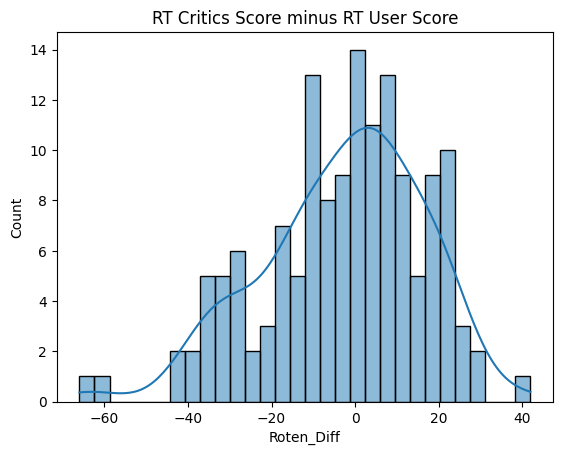

In [177]:
plt.title("RT Critics Score minus RT User Score");
sns.histplot( x='Roten_Diff',data=all_sites,kde=True, bins=30)

**Далее нарисуем график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

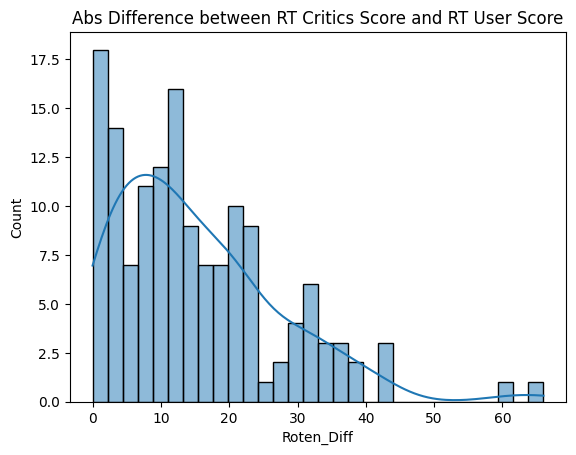

In [178]:

sns.histplot(x=all_sites['Roten_Diff'].apply(abs),bins=30,kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score");

5 фильмов которые в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков

In [179]:
all_sites.nsmallest(5,'Roten_Diff')[['FILM','Roten_Diff']]

,FILM,Roten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Далее наоборот - 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.

In [180]:
all_sites.nlargest(5,'Roten_Diff')[['FILM','Roten_Diff']]

,FILM,Roten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Рейтинги от MetaCritic

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**Нарисуем график scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

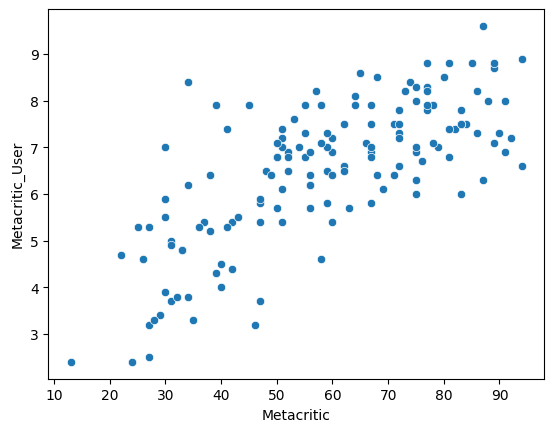

In [181]:
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites)

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**Нарисуем график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

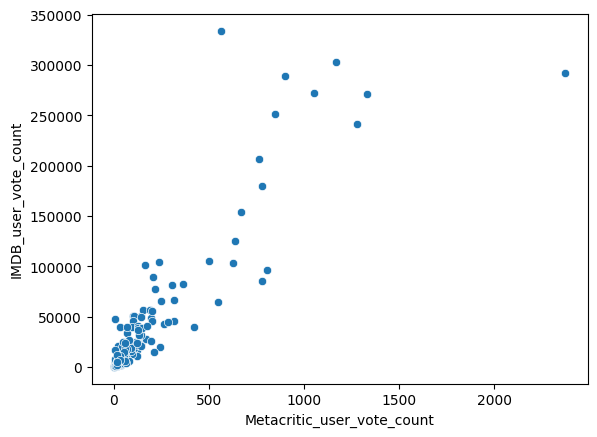

In [182]:
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count');

Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic.

In [183]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Roten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [184]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Roten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

## 🔗 Объединение данных Fandango и других сайтов  

Для более детального анализа необходимо объединить рейтинги с разных платформ.  
Однако не все фильмы из таблицы **Fandango** представлены в **all_sites**  
(например, если у них мало отзывов или их нет в базе).  

Чтобы сравнивать только **общие фильмы**, будет выполнено объединение данных  
по колонке `FILM` с использованием **"inner merge"**. Это гарантирует,  
что в итоговой таблице останутся только те фильмы, которые есть в обеих выборках.  


In [185]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int32  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Roten_Diff                  145 non-null    int64  
dtypes: float64(4), int32(1), int64(7), 

In [187]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Roten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


## 🔄 Нормализация рейтингов до диапазона 0-5

Компания **Fandango** использует шкалу от 0 до 5 звезд для оценки фильмов.  
Однако другие платформы, такие как **Rotten Tomatoes**, **Metacritic** и **IMDB**,  
используют другие шкалы для оценки, которые нужно привести к общему диапазону для корректного сравнения.

Задача заключается в том, чтобы **нормализовать рейтинги** с других платформ,  
чтобы все значения находились в диапазоне от **0 до 5 звезд**. Это позволит провести  
правильное сравнение и выявить возможные различия в оценках фильмов между платформами.  


In [188]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [189]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [190]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [191]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Roten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [192]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [193]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


## 📊 Сравнение распределений рейтингов от разных компаний

Теперь, когда мы нормализовали рейтинги с различных платформ до диапазона 0-5,  
пришло время провести **сравнение**. Мы уже выяснили, что рейтинг, отображаемый на **Fandango** (STARS),  
выше, чем фактический рейтинг пользователей (RATING). Теперь необходимо проверить,  
являются ли рейтинги **Fandango** в целом более высокими по сравнению с другими платформами,  
такими как **Rotten Tomatoes**, **Metacritic** и **IMDB**.

Для этого будет построен **KDE-график (Kernel Density Estimation)**, который  
отобразит распределения нормализованных рейтингов для всех платформ.  
Цель — увидеть, есть ли явные различия в распределениях оценок между компаниями.

Визуализация поможет понять, склонна ли **Fandango** завышать оценки по сравнению с другими платформами.  


<Axes: ylabel='Density'>

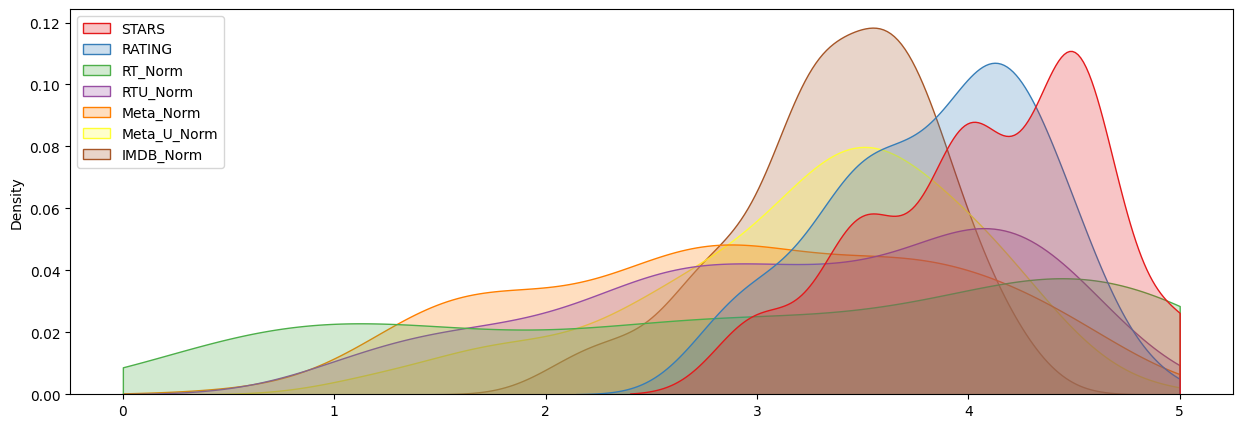

In [194]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=norm_scores,fill=True,palette='Set1', clip=[0,5])

## 🔍 Сравнение распределений рейтингов Fandango и Rotten Tomatoes

После предварительного анализа мы заметили, что рейтинги **Fandango** имеют тенденцию  
быть сильно смещёнными вправо. Также интересно, что рейтинги критиков на **Rotten Tomatoes**  
имеют более пологую форму распределения.  

Теперь давайте сосредоточимся только на этих двух распределениях,  
чтобы более детально сравнить их. Для этого построим **KDE-график**,  
сравнивающий распределения **STARS (Fandango)** и **Rotten Tomatoes** от критиков.  

Это поможет нам понять, насколько различаются оценки критиков на Rotten Tomatoes  
и оценки, которые Fandango отображает для фильмов.  

<Axes: ylabel='Density'>

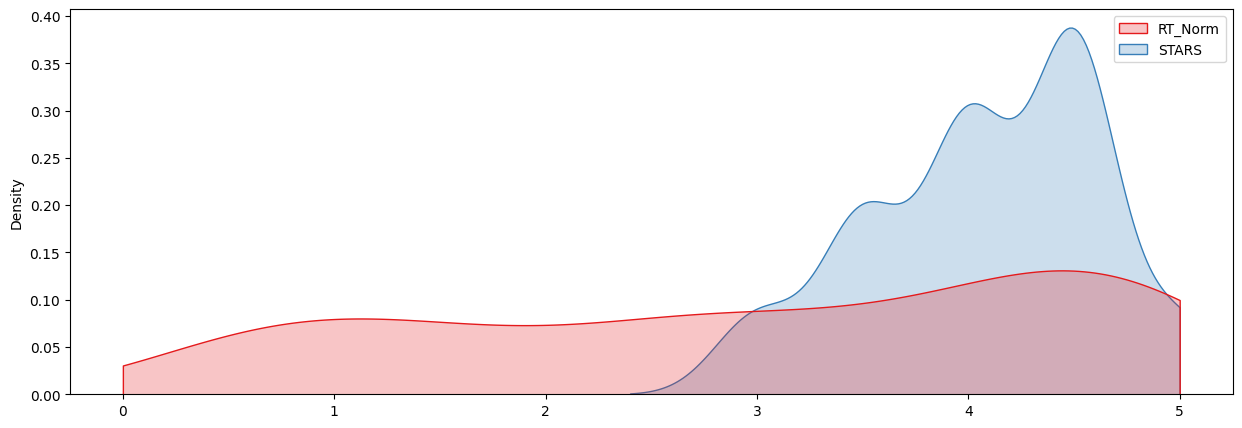

In [195]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],fill=True,palette='Set1')

<Axes: ylabel='Count'>

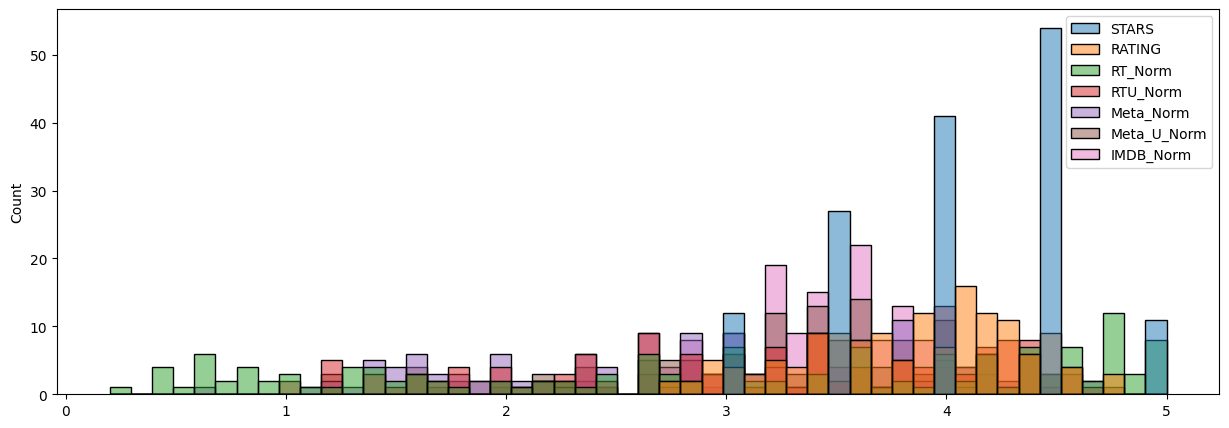

In [196]:
plt.figure(figsize=(15,5))
sns.histplot(data=norm_scores,bins=50)

## 🔍 Как различные компании оценивают фильмы с наименьшими рейтингами?

Для более глубокого анализа стоит рассмотреть, как различные компании оценивают фильмы с самыми низкими рейтингами.  
Сравним **нормализованные рейтинги** фильмов на разных платформах, чтобы понять, как компании, такие как **Fandango**, **Rotten Tomatoes**, **Metacritic** и **IMDB**, оценивают фильмы с наименьшими рейтингами.  

Для этого построим **clustermap**, который визуализирует кластеры фильмов с разными рейтингами.  
Фильмы с высокими оценками будут сгруппированы в один кластер, а фильмы с низкими рейтингами — в другой.  
Это поможет нам увидеть, насколько разные компании сходятся или расходятся в оценке плохих фильмов.

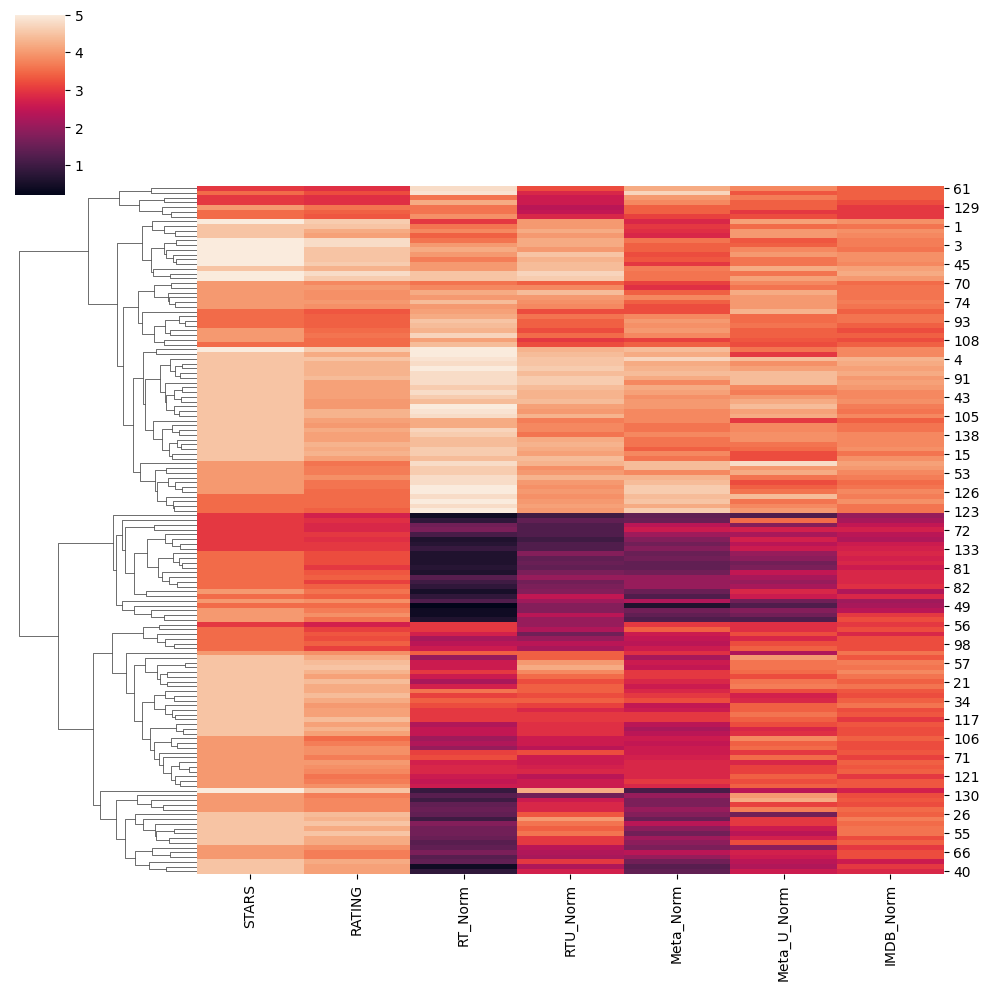

In [197]:
sns.clustermap(data=norm_scores,col_cluster=False)

## 🔎 Анализ фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic

Мы уже заметили, что рейтинги на **Fandango** часто оказываются выше по сравнению с другими платформами,  
особенно если смотреть на округлённые вверх значения. Теперь давайте сосредоточимся на **10 фильмах с наихудшими рейтингами**  
по версии **Rotten Tomatoes Critic** и посмотрим, какие нормализованные рейтинги этим фильмам поставили другие компании.  

Для этого:
1. Найдём **10 фильмов с наименьшими рейтингами** на Rotten Tomatoes по версии критиков.
2. Проверим, как эти фильмы были оценены на других платформах, таких как **Fandango**, **Metacritic** и **IMDB**.

In [198]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [199]:
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.

<Axes: ylabel='Density'>

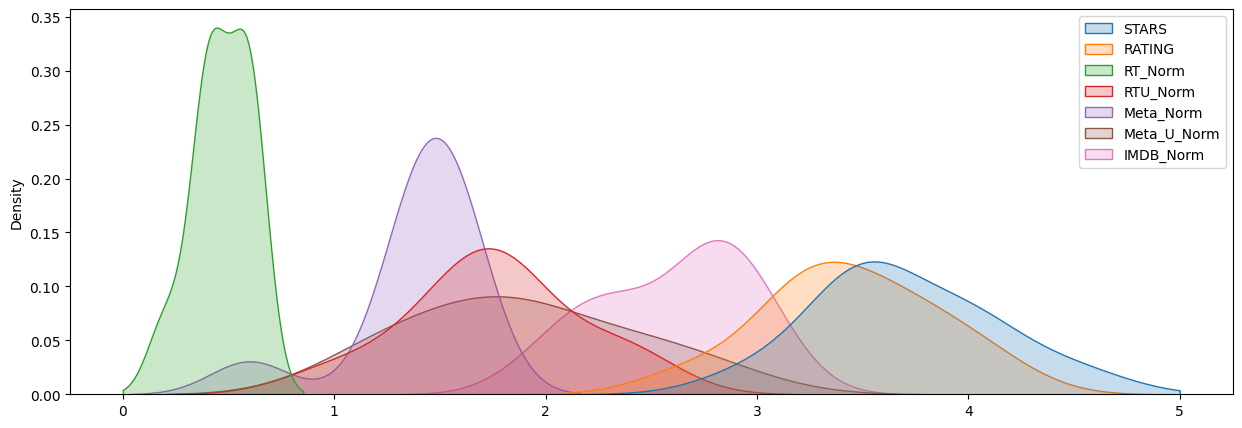

In [200]:
plt.figure(figsize=(15,5))
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True)

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

Выводы: Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!
    
Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний.

In [201]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [202]:
0.4+2.3+1.3+2.3+3

9.3

In [203]:
9.3/5

1.86